# Homework 2: Regression
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [ ]:
# Download data
# ! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 22:39:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-10-07 22:39:21 (92.5 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


# Preparing the dataset
Use only the following columns:
- 'engine_displacement',
- 'horsepower',
- 'vehicle_weight',
- 'model_year',
- 'fuel_efficiency_mpg'

In [3]:
columns_to_keep = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
df_subset = df[columns_to_keep].copy()
df_subset.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


# EDA
- Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

Skewness of fuel_efficiency_mpg: -0.0121


count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

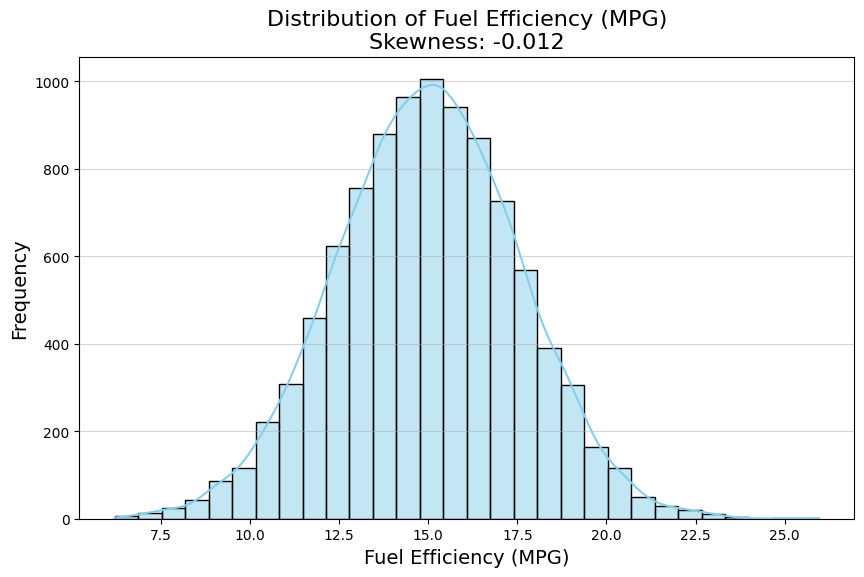

In [4]:
# Select the variable of interest
fuel_efficiency = df['fuel_efficiency_mpg']

# 1. Calculate Skewness to quantify the tail
skewness = fuel_efficiency.skew()

# 2. Generate Histogram and KDE plot
plt.figure(figsize=(10, 6))
# kde=True adds the smooth density curve (KDE)
sns.histplot(fuel_efficiency, kde=True, bins=30, color='skyblue') 

# Add title and labels
plt.title(f'Distribution of Fuel Efficiency (MPG)\nSkewness: {skewness:.3f}', fontsize=16)
plt.xlabel('Fuel Efficiency (MPG)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.5)

# Save the chart
plt.savefig('fuel_efficiency_distribution.png') 

print(f"Skewness of fuel_efficiency_mpg: {skewness:.4f}")
fuel_efficiency.describe()

The shape clearly shows a distribution that is centralized and tapers off roughly equally on both the low and high ends, confirming its near-symmetrical nature, not a long tail.

# Question 1
There's one column with missing values. What is it?
- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'

In [5]:
# 3. Use the .info() method to check data types and non-null counts
print("\nSubset DataFrame Info:")
df_subset.info()
print("\nMissing Values in Subset DataFrame:")
print(df_subset.isnull().sum())


Subset DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB

Missing Values in Subset DataFrame:
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


# Question 2
What's the median (50% percentile) for variable `horsepower`?
- 49
- 99
- 149
- 199

In [6]:
print(f"The median (50th percentile) for 'horsepower' is: {df_subset['horsepower'].median()} OR {df_subset['horsepower'].describe()['50%']} OR {df_subset['horsepower'].quantile(0.5)}")

The median (50th percentile) for 'horsepower' is: 149.0 OR 149.0 OR 149.0


# Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.  
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lecture.

In [7]:
def split_data(df, seed=42):
      # Calculate the number of rows for each set
      n = len(df)
      n_val = int(n * 0.2)
      n_test = int(n * 0.2)
      n_train = n - n_val - n_test

      # Shuffle the DataFrame
      idx = np.arange(n)
      np.random.seed(seed)
      np.random.shuffle(idx)

      # Split the DataFrame
      df_train = df.iloc[idx[:n_train]]
      df_val = df.iloc[idx[n_train:n_train + n_val]]
      df_test = df.iloc[idx[n_train + n_val:]]

      # Reset indices
      df_train = df_train.reset_index(drop=True)
      df_val = df_val.reset_index(drop=True)
      df_test = df_test.reset_index(drop=True)

      # Get the target variable values
      y_train = df_train[['fuel_efficiency_mpg']]
      y_val = df_val[['fuel_efficiency_mpg']]
      y_test = df_test[['fuel_efficiency_mpg']]

      # Get the feature variable values
      del df_train['fuel_efficiency_mpg']
      del df_val['fuel_efficiency_mpg']
      del df_test['fuel_efficiency_mpg']

      # Verify the size of splits
      print(f"Total rows: {n}, Train rows: {len(df_train)}, Val rows: {len(df_val)}, Test rows: {len(df_test)}")

      # Return the features and target variables
      return df_train, y_train, df_val, y_val, df_test, y_test

df_train, y_train, df_val, y_val, df_test, y_test = split_data(df_subset, seed=42)



Total rows: 9704, Train rows: 5824, Val rows: 1940, Test rows: 1940


# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [8]:
def train_linear_regression(X, y):
    # Ensure numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Add column of ones for the bias term (intercept)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Compute the normal equation: w = (XᵀX)⁻¹ Xᵀy
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    # Return bias and weights separately
    w0 = w_full[0]           # intercept
    w = w_full[1:]           # feature coefficients
    return w0, w

def rmse(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    mse = ((y - y_pred)**2).mean()    
    return round(np.sqrt(mse), 2)

In [16]:
# Fill missing horsepower values with 0
X_train_zero = df_train.fillna(0)
X_val_zero = df_val.fillna(0)

# Train the model
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# Get predictions on the validation set
y_pred_val_zero = w0_zero + X_val_zero.dot(w_zero)

rmse(y_val, y_pred_val_zero)

np.float64(0.52)

In [17]:
# Fill missing horsepower values with calculated mean
train_mean_horsepower = df_train['horsepower'].mean()
val_mean_horsepower = df_val['horsepower'].mean()
X_train_mean = df_train.fillna(train_mean_horsepower)
X_val_mean = df_val.fillna(val_mean_horsepower)

# Train the model
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# Get predictions on the validation set
y_pred_val_mean = w0_mean + X_val_mean.dot(w_mean)

rmse(y_val, y_pred_val_mean)

np.float64(0.46)